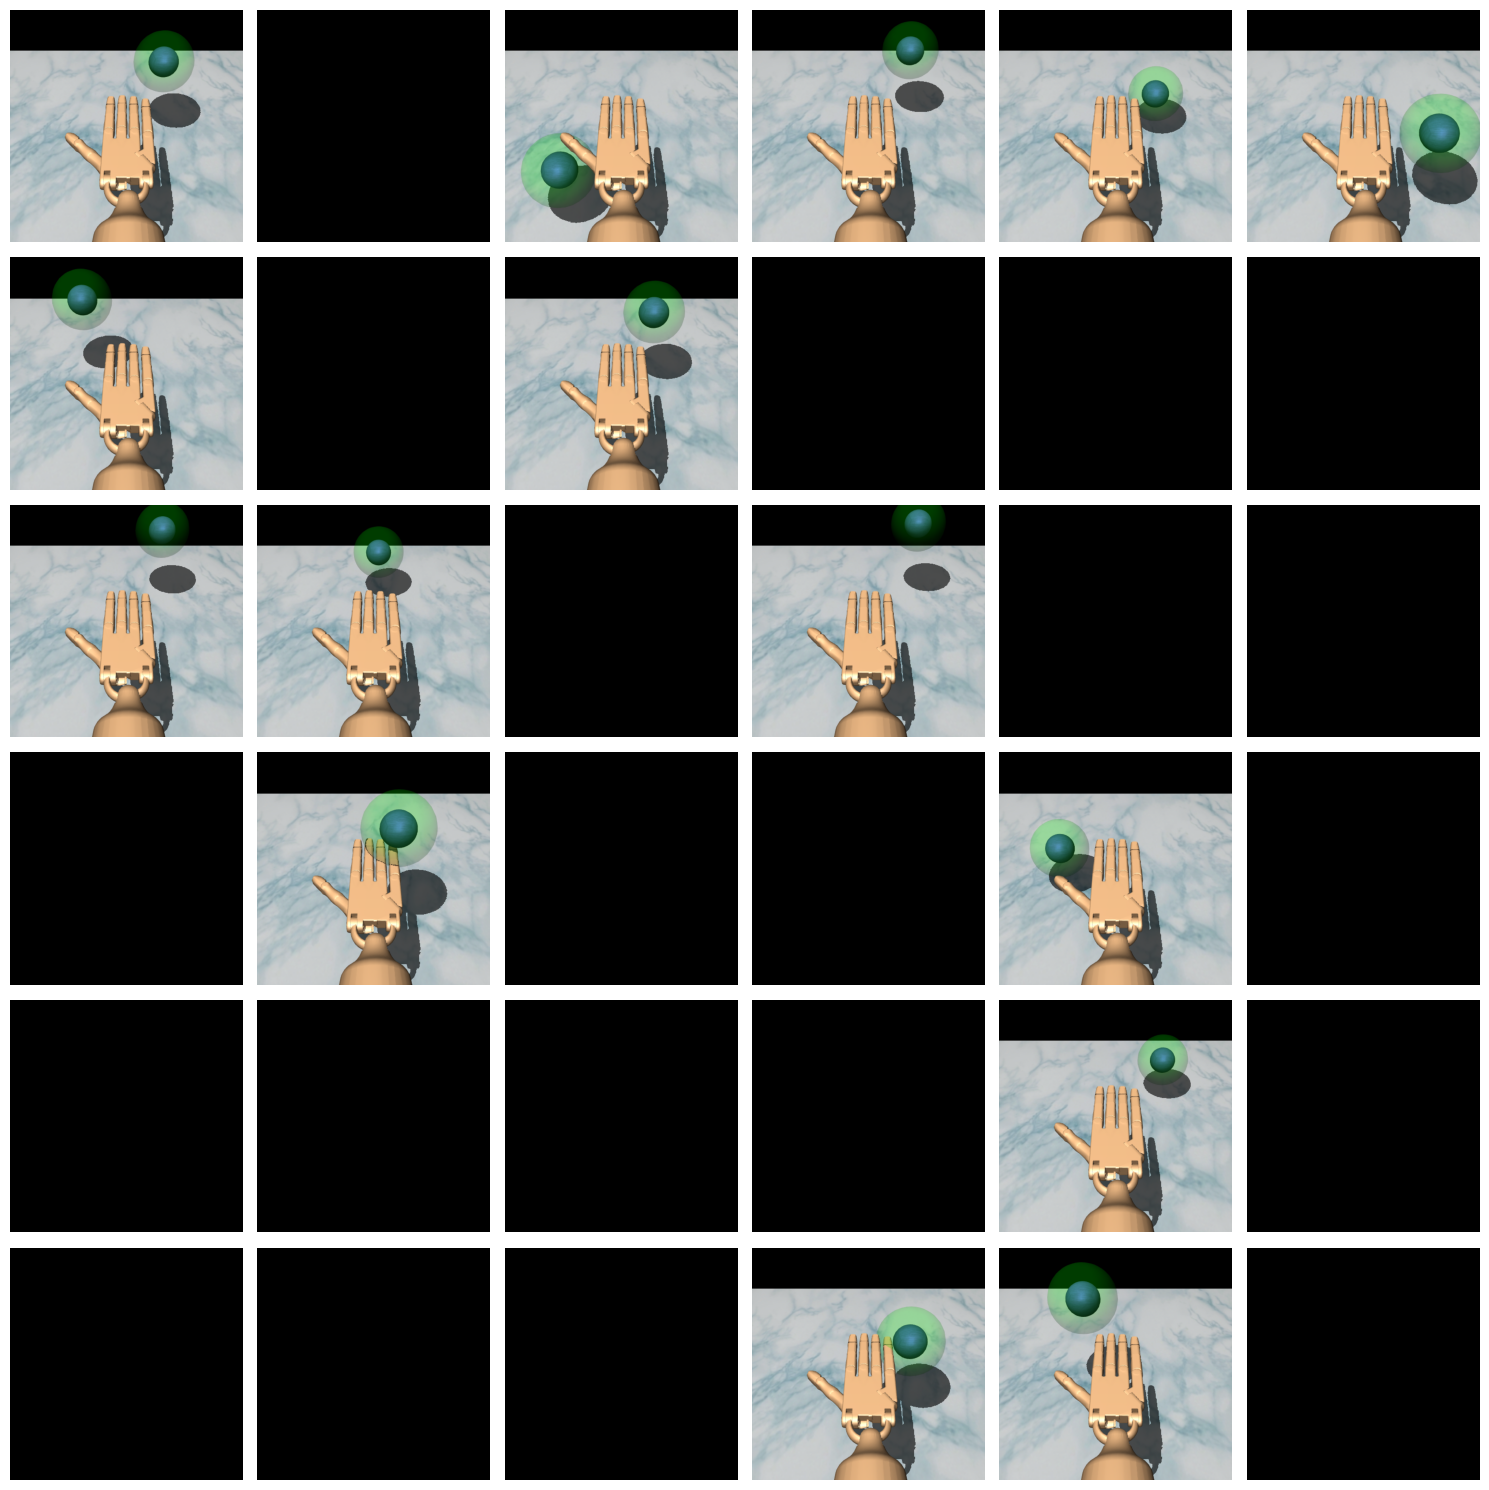

In [8]:
import matplotlib
import matplotlib.figure
import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import DataLoader
from datasets.vae_dataset import VAEDataset

# Initialize the dataset
data_path = Path('./datasets/vae_dataset_AdroitHandRelocate-v1_131072.h5')
ds = VAEDataset(data_path=data_path)

# Create a DataLoader for loading the images
dataloader = DataLoader(ds, batch_size=36, shuffle=True)

# Function to display a grid of images
def get_images_grid(images, num_rows=6, num_cols=6) -> matplotlib.figure.Figure:
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    ax = ax.ravel()
    for i in range(num_rows * num_cols):
        img = images[i].permute(1, 2, 0)  # Convert from CHW to HWC for visualization
        ax[i].imshow(img.numpy())
        ax[i].axis('off')
    fig.tight_layout()
    return fig

# Load a batch of images and display them
for images in dataloader:
    fig = get_images_grid(images)
    fig.savefig('testing.png')
    break  # Only display the first batch

# Close the dataset file after use
ds.close()